Density profiles plots for ECC-lipids paper
====

Set up environment, 
Load required modules,
set up constants:

In [1]:
%pylab inline
import sys, os
sys.path.append('/mnt/ssd/mempot-scripts')

import read_xvg_calc_mean as rxvg

#import cPickle
import numpy as np
#from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt
#from   matplotlib.pyplot import plot as pp
#from   matplotlib.pyplot import show as ps
#import membrane_capacitance as memcap
#from   membrane_capacitance import q_profile as qp
#from   membrane_capacitance import Densities as dens
#import smoothen_data as sm
import fnmatch

#Load background plotting image:
import matplotlib.image as mpimg

mymagenta = '#993388'
myphos = '#ff796c'
mysodium = '#9e2fBe'
mygreen   = '#467705'
#mygreen   = '#DD3377' # is now magenta
myblue    = '#2376BE'
myblack   = '#0A0832'
#myyellow  = '#EECD11'
myyellow  = '#EEBB00'
mywater = '#a3fae9'
hlineColour = '#204020'
vlineColour = '#585100'


Populating the interactive namespace from numpy and matplotlib


In [2]:
def locate(pattern, root=os.curdir):
    '''Locate all files matching supplied filename pattern in and below
    supplied root directory.'''
    for path, dirs, files in os.walk(os.path.abspath(root)):
        for filename in fnmatch.filter(files, pattern):
            yield os.path.join(path, filename)


In [3]:
class Densities():
    ''' class for storage of density profiles from molecular simulation
       Originally designed to be used along with ECC-lipids development
       Optional arguments during init:
          Stores arbitrary number of density profiles contained in one density file (Gromacs g_density output) as one big numpy array.
       TODO: Header, Gromacs (self.comments) and Grace (self.grace) comments, are stored in respective lists of lines.
    '''

    def __init__(self, fname=None):  # , qprofile=None, qp_fname=None):
        self.fname = fname       
        # Load densities from fname to self.dens
        if not fname==None:
            if isinstance(fname, str):
                #load the densities
                self.dens = self.load_dens()
                if self.dens.shape[1]==5:
                    print "Splitting the loaded density into 5 individual named densities assuming a particular order."
                    (self.x, self.cation, self.anion, self.wat, self.phos) = np.hsplit(self.dens, self.dens.shape[1])
            else:
                raise RuntimeError, "Parameter filename %s provided, but it is not a string. Densities not loaded. " % (fname,)
        else:
            print "Filename not provided, no densities loaded."

    def load_dens(self):
        """ Returns multi-dim numpy array containing all density profiles from file self.fname """
        try: open(self.fname,"r")
        except: 
            raise IOError, "File %s could not be opened." % (self.fname,)
        return np.array( rxvg.lines_to_list_of_lists(rxvg.read_xvg(self.fname)) )



In [4]:
sim_dirs = []
for f in locate("dens_cation_anion_water_phos.xvg", root=os.curdir+"/NpT"):
    if "sim22a_0mM" in f and "NaCl" in f and "SPCE" in f:
        #sim_dirs.append(os.path.dirname(f))
        sim_dirs.append(f)
    if "sim22a_" in f and "SPCE" in f and "mM_CaCl-2s" in f and not "_smallZ" in f:
        #sim_dirs.append(os.path.dirname(f))
        sim_dirs.append(f)
    else:
        sim_dirs.append(f)
        

for f in sim_dirs:
    print f
    if "300K" in f:
        sim_dirs.remove(f)
    if "_smallZ" in f:
        sim_dirs.remove(f)
        print "Removed smallZ simulations"
        
sim_dirs.sort()


/mnt/ssd/NMRlipids_VI-NewIonModel/simulations/POPC/lipid14/NpT/sim22a_346mM_CaCl-2s_SPCE_non-tail-atoms_q-sc_0.80_sig-sc_0.89/dens_cation_anion_water_phos.xvg
/mnt/ssd/NMRlipids_VI-NewIonModel/simulations/POPC/lipid14/NpT/sim22a_978mM_NaCl_SPCE_non-tail-atoms_q-sc_0.80_sig-sc_0.89/dens_cation_anion_water_phos.xvg
/mnt/ssd/NMRlipids_VI-NewIonModel/simulations/POPC/lipid14/NpT/sim3-3_346mM_CaCl-2s_TIP3p/dens_cation_anion_water_phos.xvg
/mnt/ssd/NMRlipids_VI-NewIonModel/simulations/POPC/lipid14/NpT/sim2-3_346mM_CaCl2_full-Dang_TIP3p/dens_cation_anion_water_phos.xvg
/mnt/ssd/NMRlipids_VI-NewIonModel/simulations/POPC/lipid14/NpT/sim0-3_350mM_CaCl_Aqvist_TIP3p/dens_cation_anion_water_phos.xvg


In [5]:
sims = []
for d in sim_dirs:
    sim = Densities(d)
    sims.append(sim)

Splitting the loaded density into 5 individual named densities assuming a particular order.
Splitting the loaded density into 5 individual named densities assuming a particular order.
Splitting the loaded density into 5 individual named densities assuming a particular order.
Splitting the loaded density into 5 individual named densities assuming a particular order.
Splitting the loaded density into 5 individual named densities assuming a particular order.


In [6]:
def put_labels(fname):
    """ Simple function that provides labels acording to the folder name a simulation is in."""
    dir_label_dic = { "sim22a_3" : 'ECC-lipids / ECC-ions\n$\Gamma^w _{Ca}=0.06 \mathrm{nm}^{-2}$',
                      "sim22a_9" : 'ECC-lipids / ECC-ions (NaCl)\n$\Gamma^w _{Na}=-0.11 \mathrm{nm}^{-2}$',
                      "sim2-3"   : 'Lipid14 / Dang ions\n$\Gamma^w _{Ca}=0.26 \mathrm{nm}^{-2}$',
                      "sim0-3"   : ur"Lipid14 / \u00c5qvist ions\u000a$\Gamma^w _{Ca}=0.13 \mathrm{nm}^{-2}$",
                      "sim3-3"   : "Lipid14 / ECC-ions\n$\Gamma^w _{Ca}\simeq 0.4 \mathrm{nm}^{-2}$" }
    match = False
    for key in dir_label_dic.keys():
        if key in fname:
            label = dir_label_dic[key]
            if match:
                raise UserWarning, "Multiple folder-name : label matches -- using the last one! /nSimulation in folder: {}".format(fname)
            else:
                match = True
    return label
            

In [7]:
for s in sims:
    s.label = put_labels(s.fname)

In [8]:
# reorder sims in list
sims.insert(2, sims.pop())

Densities plot
---
all density instances in sims plotted here

In [9]:
imgpatch = mpimg.imread("single_membrane_horiz.png")
imgpatch_nacl = mpimg.imread("single_membrane_horiz_NaCl.png")

def plot_densities(axplt, sim):
    """ 
    Simple procedure for plotting the densities of Densities-instances 
    with a particular focus on the named profiles
    """
    # plot limits
    ymax = 0.99
    xlims = (0.0, 4.2)
    ylims = (-ymax*0.,ymax)

    axplt.set_xlim( xlims )
    axplt.set_ylim( ylims )

    #axplt.set_ylabel('normalized number density / nm$^{-3}$')

    
    axplt.text(0.5, 0.85, s.label,
               color=myblack,
               bbox=dict(facecolor='white', 
                         alpha=0.65, lw=0),
                         horizontalalignment='center',
                         verticalalignment='center',
                         transform=axplt.transAxes)

    x = sim.x
    # plotting

    if not "NaCl" in sim.fname:
        denom_cation = 1.0
        label_cation = 'calcium'
        color_cation = myblue
        # background image settings
        imgw = 680
        imgh = 970
        cropx = 260
        cropy = 730
        imgplot = axplt.imshow(imgpatch[cropx:-cropx,cropy:], alpha=0.7, aspect='auto', extent=(xlims + ylims) )
    else: 
        denom_cation = 2.0
        label_cation = 'sodium'
        color_cation = mysodium
        # background image settings
        imgw = 680
        imgh = 970
        cropx = 270
        cropy = 630
        imgplot = axplt.imshow(imgpatch_nacl[cropx:-cropx,cropy:], alpha=0.7, aspect='auto', extent=(xlims + ylims) )
        
    axplt.fill_between(x.ravel(), sim.phos.ravel()/5.0,  lw=0, alpha=0.8, color=myphos, label='phosphate')
    axplt.fill_between(x.ravel(), sim.wat.ravel()/200.0, lw=0, alpha=0.6, color=mywater, label='water')
    #axplt.plot(x, sim.phos/3.0,  label=sim.label,           lw=4, color=mymagenta)
    axplt.plot(x, sim.anion/2.0, label="chloride", lw=4, color=mygreen)
    axplt.plot(x, sim.cation/denom_cation,    label=label_cation,  lw=4, color=color_cation)
    
    #plt.plot(x, conf1.qp.p[0:len(x)], label="constant electric field", lw=2, ls='--', color=mygreen)
    #plt.title('Membrane potential profile of S-lipids-VIS POPC (150mM KCl)')
    #axplt.legend(loc='upper left')

    #plt.savefig("potential_profiles_iimb-constf_SlipidsVIS_POPC_150mM_NaCl.png", dpi=300)
    #return plt.Axes.axes

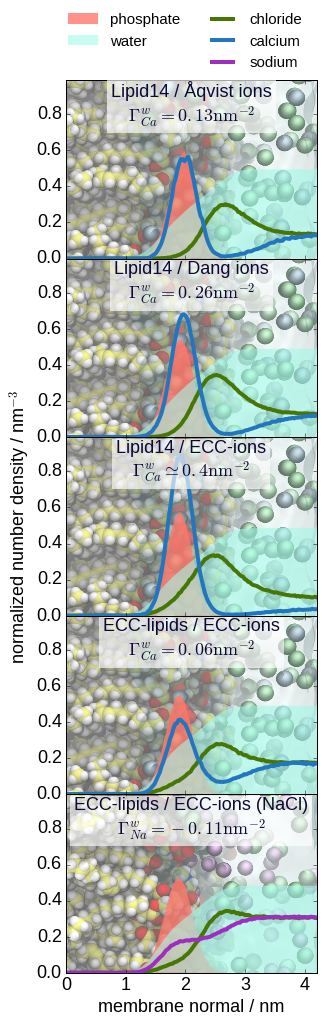

In [12]:
font = {'family' : 'Liberation Sans',
        'style'  : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

n_sims = n_plots = len(sims)
fig, axs = plt.subplots(nrows=n_plots, ncols=1, sharex="all", figsize=[4.50,3.20*n_plots], dpi=200)
fig.subplots_adjust(hspace=0.0)

for i, s in enumerate(sims):
    plot_densities(axs[i], s)

axs[0].plot(-1.0, -1.0, lw=4.0, color=mysodium, label='sodium')
#plt.legend(handles=[sodium_legend_patch])

axs[0].legend(bbox_transform=plt.gcf().transFigure,
             bbox_to_anchor=(0.52, 0.97), 
             ncol=2, mode="expand",
             frameon=False,
             fontsize='small',
             )
axs[2].set_ylabel('normalized number density / nm$^{-3}$')
axs[-1].set_xlabel('membrane normal / nm')

pna=axs[-1]
xlim = pna.get_xlim()
pna.set_xticks(range(0,5,1))
pna.set_xticklabels([ str(i) for i in range(0,5,1)])
pna.set_xlim(xlim)


plt.savefig("density_profiles_ca_cl_wat_phos_models-compar.pdf", dpi=200, bbox_inches='tight')    

fig.show()